# 고령 운전자 지역별 교통사고 발생률 비교

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
traffic_accident_city_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_city_5`
    WHERE
        age_group = 65
"""

In [5]:
traffic_accident_city_df = client.query(traffic_accident_city_sql).to_dataframe()
traffic_accident_city_df = traffic_accident_city_df.set_index("age_group")
traffic_accident_city_df = traffic_accident_city_df.sort_index(axis=1)

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
traffic_accident_city_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
age_group,,,,,,,,,,,,,,,,,
65,1313.0,7338.6,2020.4,2600.4,1084.4,2040.6,1132.8,2027.0,5890.0,110.6,550.2,1042.4,2028.6,1361.2,631.4,1473.2,1438.8


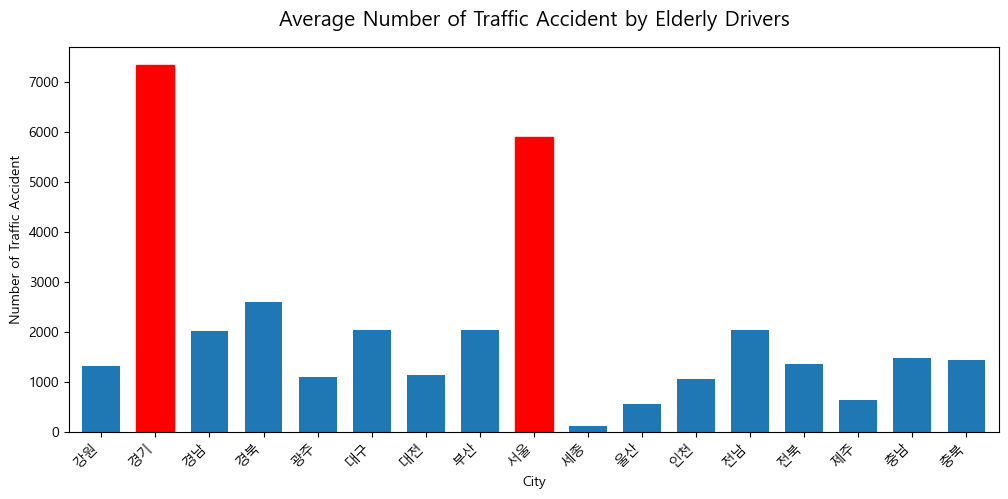

In [7]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
ax = traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, city in zip(ax.patches, traffic_accident_city_df.index):
    if city == "서울" or city == "경기":
        bar.set_color("red")
        
plt.title("Average Number of Traffic Accident by Elderly Drivers", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Number of Traffic Accident")
plt.xticks(rotation=45, ha="right")
ax.legend().remove()
plt.savefig("traffic_accident_city_v1.png", bbox_inches="tight")